In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, auc, classification_report
from sklearn.linear_model import RidgeCV
import sys
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#sys.path.insert(0, '../src')
#from Hate_Crime import HateCrimeAnalyzer

In [2]:
# Load your dataset
tx_data = pd.read_csv("../src/texas_processed_data.csv")
nc_data = pd.read_csv("../src/nc.processed_data.csv")
us_data = pd.read_csv("../src/combined_data_processed_data.csv")

# Encode categorical variables
label_encoders = {}
for col in ['OFFENDER_RACE', 'BIAS_DESC']:
    le = LabelEncoder()
    tx_data[col] = le.fit_transform(tx_data[col])
    label_encoders[col] = le
    


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# # Create and fit the Multinomial Logistic Regression model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))


In [56]:
tx_data

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,7,Individual,Violent
1,4204,2411,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,7,Individual,Violent
2,4205,2412,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,1,Individual,Violent
3,4206,2413,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,50,Individual,Violent
4,4207,2414,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,7,Other,Non-Violent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,7,Individual,Violent
8479,218043,1124581,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,32,Individual,Violent
8480,218044,1220182,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,49,Individual,Violent
8481,218045,1220183,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,25,Individual,Violent


In [ ]:
# Encode categorical variables
label_encoders = {}
for col in ['OFFENDER_RACE','BIAS_DESC','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']:
    le = LabelEncoder()
    nc_data[col] = le.fit_transform(nc_data[col])
    label_encoders[col] = le

# # Define your features and target variable
# X = nc_data[['OFFENDER_RACE','BIAS_DESC']]
# y = nc_data['SEVERITY']  # Replace with your actual target variable

# # # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# # # Create and fit the Multinomial Logistic Regression model
# # model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)
# # model.fit(X_train, y_train)

# # # Make predictions on the test set
# # y_pred = model.predict(X_test)

# # # Evaluate the model
# # print(classification_report(y_test, y_pred))

In [ ]:
nc_data

In [ ]:
# Create a binary target variable based on mean incident count
# Define predictors and target variable
logistic_X = tx_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT']]
logistic_y = tx_data['SEVERITY']
# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)
# Create a logistic regression model
logistic_model = LogisticRegression()
# Perform k-fold cross-validation (k=5 in this example)
num_folds = 5
cross_val_scores = cross_val_score(logistic_model, logistic_X_scaled, logistic_y, cv=num_folds, scoring='accuracy')
# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

In [ ]:
# Create a binary target variable based on mean incident count
# Define predictors and target variable
logistic_X = nc_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT']]
logistic_y = nc_data['SEVERITY']
# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)
# Create a logistic regression model
logistic_model = LogisticRegression()
# Perform k-fold cross-validation (k=5 in this example)
num_folds = 5
cross_val_scores = cross_val_score(logistic_model, logistic_X_scaled, logistic_y, cv=num_folds, scoring='accuracy')
# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

In [ ]:
# logistic_X = tx_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT',]]
# logistic_y = tx_data['SEVERITY']
# # Scale the predictors
# scaler = StandardScaler()
# logistic_X_scaled = scaler.fit_transform(logistic_X)
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)
# # Fit the logistic regression model
# logistic_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
# print(logistic_model.summary())
# # Make predictions on the test set
# y_pred = logistic_model.predict(sm.add_constant(X_test))
# y_pred_binary = (y_pred > 0.33).astype(int)
# # Evaluate the model
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_binary))
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_binary))

In [ ]:
# logistic_X = nc_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT',]]
# logistic_y = nc_data['SEVERITY']
# # Scale the predictors
# scaler = StandardScaler()
# logistic_X_scaled = scaler.fit_transform(logistic_X)
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)
# # Fit the logistic regression model
# logistic_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
# print(logistic_model.summary())
# # Make predictions on the test set
# y_pred = logistic_model.predict(sm.add_constant(X_test))
# y_pred_binary = (y_pred > 0.33).astype(int)
# # Evaluate the model
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_binary))
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_binary))

In [ ]:
# Define independent & dependent variable
X = tx_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT',]]
y = tx_data['SEVERITY']
# Fit the multiple linear regression model due to having two independent variables
model = sm.OLS(y, X).fit()
# Print the summary
print(model.summary())

In [ ]:
# Define independent & dependent variable
X = nc_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT',]]
y = nc_data['SEVERITY']
# Fit the multiple linear regression model due to having two independent variables
model = sm.OLS(y, X).fit()
# Print the summary
print(model.summary())

C:\Users\chris\AppData\Local\Temp\ipykernel_65560\638162967.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = tx_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']].corr()


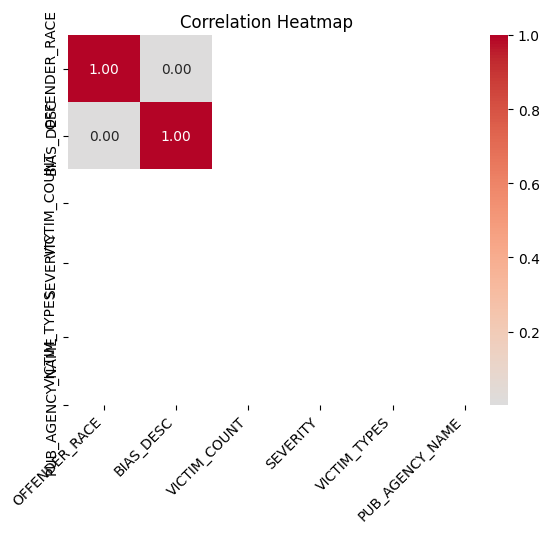

In [48]:
correlation_matrix2 = tx_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
labels = ['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=labels, rotation=45, ha='right')
plt.yticks(ticks=[0.5,1.5,2.5,3.4,4.5,5.5], labels=labels, ha='right')
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_65560\638162967.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = tx_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']].corr()


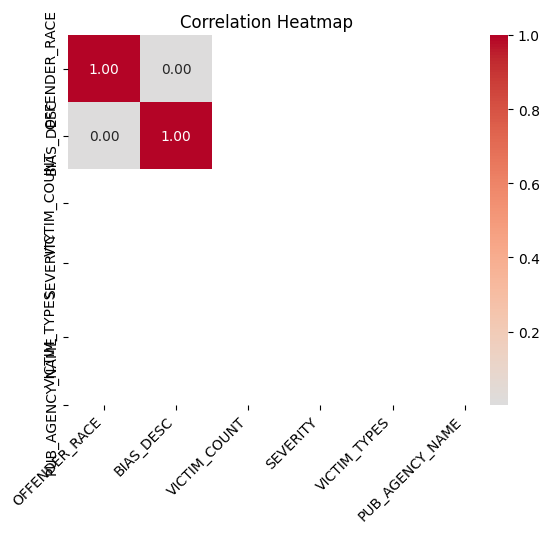

In [49]:
correlation_matrix2 = tx_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
labels = ['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=labels, rotation=45, ha='right')
plt.yticks(ticks=[0.5,1.5,2.5,3.4,4.5,5.5], labels=labels, ha='right')
plt.show()

In [ ]:
correlation_matrix2 = nc_data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
labels = ['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=labels, rotation=45, ha='right')
plt.yticks(ticks=[0.5,1.5,2.5,3.4,4.5,5.5], labels=labels, ha='right')

In [ ]:
tx_filtered_data = tx_data[["DATA_YEAR", "INCIDENT_ID"]]
nc_filtered_data = nc_data[["DATA_YEAR", "INCIDENT_ID"]]

# Group by DATA_YEAR and calculate the sum of INCIDENT_ID for each year
nc_grouped = nc_filtered_data.groupby("DATA_YEAR").size()
tx_grouped = tx_filtered_data.groupby("DATA_YEAR").size()

# Add labels, title, and legend
plt.figure(figsize=(10, 6))
plt.plot(nc_grouped.index, nc_grouped.values, marker='o', label='NC Hate Crime Overtime')
plt.plot(tx_grouped.index, tx_grouped.values, marker='*', label='TX Hate Crime Overtime')
plt.fill_between(nc_grouped.index, nc_grouped.values, alpha=0.5)
plt.fill_between(tx_grouped.index, tx_grouped.values, alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Total Incident Count')
plt.title('Hate Crime Incidents Over Time')
plt.legend()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have already encoded the 'OFFENDER_RACE' column as numerical values

# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(tx_data['OFFENDER_RACE'], tx_data['BIAS_DESC'])

# Perform the Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square value:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


In [50]:
tx_data

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,Anti-Black or African American,Individual,Violent
1,4204,2411,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual,Violent
2,4205,2412,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,Anti-Arab,Individual,Violent
3,4206,2413,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,Anti-White,Individual,Violent
4,4207,2414,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,Anti-Black or African American,Other,Non-Violent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,Violent
8479,218043,1124581,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,Anti-Jewish,Individual,Violent
8480,218044,1220182,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Transgender,Individual,Violent
8481,218045,1220183,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,Anti-Hispanic or Latino,Individual,Violent


In [3]:
tx_data

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,Anti-Black or African American,Individual,Violent
1,4204,2411,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual,Violent
2,4205,2412,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,Anti-Arab,Individual,Violent
3,4206,2413,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,Anti-White,Individual,Violent
4,4207,2414,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,Anti-Black or African American,Other,Non-Violent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,Violent
8479,218043,1124581,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,Anti-Jewish,Individual,Violent
8480,218044,1220182,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Transgender,Individual,Violent
8481,218045,1220183,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,Anti-Hispanic or Latino,Individual,Violent


In [4]:
tx_data

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY,BIAS_DESC_NUM
0,4203,2540,1991,Dallas,TX,Texas,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,Anti-Black or African American,Individual,Violent,7
1,4204,2411,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual,Violent,7
2,4205,2412,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,Anti-Arab,Individual,Violent,1
3,4206,2413,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,Anti-White,Individual,Violent,50
4,4207,2414,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,Anti-Black or African American,Other,Non-Violent,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,Violent,7
8479,218043,1124581,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,Anti-Jewish,Individual,Violent,32
8480,218044,1220182,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Transgender,Individual,Violent,49
8481,218045,1220183,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,Anti-Hispanic or Latino,Individual,Violent,25


In [4]:
incident_id = tx_data["INCIDENT_ID"]
offender_race = tx_data["OFFENDER_RACE"]
bias_desc = tx_data["BIAS_DESC"]

C:\Users\chris\AppData\Local\Temp\ipykernel_65828\2832340035.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=offender_race, y=incident_id, data=tx_data, palette='viridis', alpha=0.7, s=50)


<Axes: xlabel='OFFENDER_RACE', ylabel='INCIDENT_ID'>

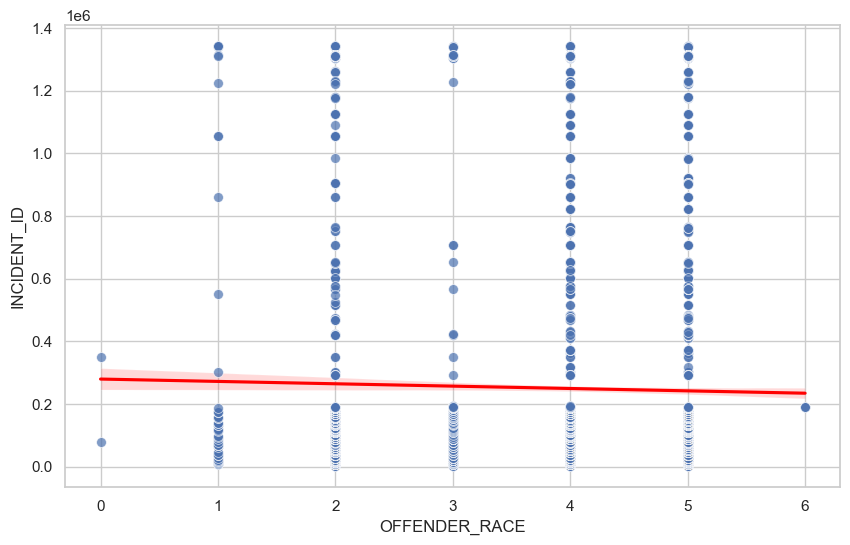

In [7]:
# Define your features and target variable
X = tx_data[['OFFENDER_RACE','BIAS_DESC']]
y = tx_data['INCIDENT_ID']  # Replace with your actual target variable

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# # Create and fit the Multinomial Logistic Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.regplot(x = tx_data[['OFFENDER_RACE']], y = tx_data['INCIDENT_ID'], scatter=False, color='red')
#plt.xticks(rotation=90)
sns.set(style='whitegrid')
sns.scatterplot(x=offender_race, y=incident_id, data=tx_data, palette='viridis', alpha=0.7, s=50)

